<a href="https://colab.research.google.com/github/paulofrancelino-prod/Calculadora-de-Integrais/blob/main/Calculadora_de_integrais_Paulo_Henrique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calculadora de integrais com soma de Riemann**

##   Introdução da ideia do código:
  O código mostrado aqui tem como objetivo calcular o valor aproximado de algumas integrais definidas dadas como input pelo usuário, bem como o intervalo de integração. O código também define uma margem de erro de aceitável para a aproximação. Para essa aplicação, a margem de erro utilizada foi de 10⁻⁶

##   A ideia geral da integral:
  Podemos, de forma mais resumida, definir a ideia geral da integral pelo objetivo de calcular a área abaixo da curva de uma função f(x). Dado esse objetivo, surgem algumas maneiras de se calcular essas áreas abaixo dessas funções, de tal maneira que é possível computar um valor aproximado para as integrais dessas funções. Por meio disso, será abordado o conceito da aproximação desses valores por meio da soma de Riemann, objeto dessa aplicação em código python.

##   Conceito de integral pela soma de Riemann:
  Temos a ideia geral de integral definida, com base no livro de James Stewart, como sendo a seguinte:

  Dada um função f, contínua definida em a ≤ x ≤ b de intervalo [a, b], dividimos o intervalo [a, b] em n subintervalos de valor Δx = (b-a)/n. Em cada subintervalo, escolhemos um ponto xi* e calculamos a soma de f(xi*)Δx. Quando n tende ao infinito, o valor da aproximação feita pelo método chega mais próximo ao valor exato da integral definida.

  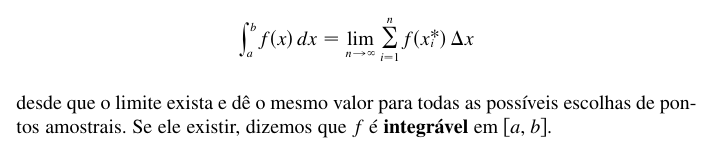

Podemos observar graficamente esse conceito, por meio dos n retângulos oriundos das subdivisões explicadas anteriormente:

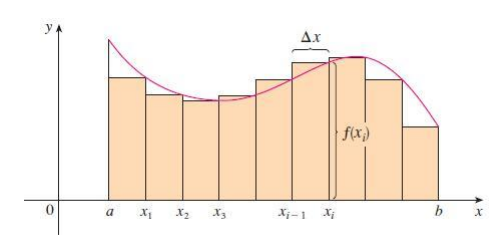

Quanto mais o número n de subintervalos aumentar, ou seja, o Δx (que representa o valor da base desses retângulos) diminuir, melhor a aproximação se torna, pois teremos áreas de retângulos que se distanciam cada vez menos da forma da função f(x).




In [4]:
import sympy as sp

def func_intervalo_ab(func, a: float, b: float, n: int):

    #Calcula a soma de Riemann no intervalo [a, b] dividindo em n subintervalos.

    #Argumentos:
        #func: Função a ser integrada.
        #a: Limite inferior.
        #b: Limite superior.
        #n: Número de subintervalos.

    #Retorno:
        #Aproximação da integral pelo método da soma de Riemann.

    step = (b - a) / n  # largura de cada subintervalo
    soma_das_areas = 0.0

    for i in range(n):
        x = a + i * step
        soma_das_areas += func(x) * step  # área de cada retângulo

    return soma_das_areas


def func_tol(func, a: float, b: float, tol: float, max_iter: int = 20):
    """
    # Calcula a integral de uma função com soma de Riemann até atingir a tolerância.

    Args:
        func: Função a ser integrada.
        a: Limite inferior.
        b: Limite superior.
        tol: Tolerância desejada.
        max_iter: Máximo de iterações (caso não venha a convergir).

    Returns:
        Aproximação da integral e número de subintervalos usados.
    """
    n = 10  # começa com um número padrão de 10 subintervalos
    prev_result = func_intervalo_ab(func, a, b, n)

    for _ in range(max_iter):
        n *= 2  # dobra o número de subintervalos
        resultado = func_intervalo_ab(func, a, b, n)

        if abs(resultado - prev_result) < tol:
            return resultado, n  # convergiu

        prev_result = resultado

    return resultado, n  # retorna melhor aproximação encontrada


# --- Execução principal ---
if __name__ == "__main__":
    print("=== Calculadora de Integrais com Tolerância ===")
    func_str = input("Função f(x): ")
    a = float(input("Limite inferior (a): "))
    b = float(input("Limite superior (b): "))
    tol = float(input("Tolerância (ex: 1e-6): "))

    # Define símbolo x
    x = sp.symbols("x")

    # Converte string em expressão simbólica
    expr = sp.sympify(func_str)

    # Converte em função numérica
    func = sp.lambdify(x, expr, "math")

    # Calcula integral
    resultado, n_usado = func_tol(func, a, b, tol)

    print(f"\nIntegral aproximada = {resultado}")
    print(f"Número de subintervalos usados: {n_usado}")



=== Calculadora de Integrais com Tolerância ===
Função f(x): x**2
Limite inferior (a): 0
Limite superior (b): 2
Tolerância (ex: 1e-6): 1e-6

Integral aproximada = 2.666665903729264
Número de subintervalos usados: 5242880
